# Some brief concepts on numerical python - NUMPY

<div class="alert alert-warning" style = "border-radius:10px">
<b>MAIN QUEST:</b> Exercise about training, test and validation. (1 week)
<p>
<b>SUB QUEST:</b> NONE
</div>

Python is not designed specifically for mathematical and scientific computing.
In particular, Python lists are very flexible containers, but they are poorly suited to efficiently represent common mathematical constructs like vectors and matrices. 

Fortunately, the **numpy** package (module) exists. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good. It is used in almost all numerical computation using Python.


Why not simply use Python lists for computations instead of creating a new array type?

There are several reasons:

* Python lists are very general. They can contain any kind of object. They are dynamically typed. They do not support mathematical functions such as matrix and dot multiplications, etc. Implementating such functions for Python lists would not be very efficient because of the dynamic typing.
* Numpy arrays are statically typed and homogeneous. The type of the elements is determined when array is created.
* Numpy arrays are memory efficient.
* Because of the static typing, fast implementation of mathematical functions such as multiplication and addition of numpy arrays can be implemented in a compiled language (C and Fortran is used).

## Basics of Numpy

To use **numpy** it is needed to import the module:

In [1]:
import numpy as np

## Creating numpy arrays
There are a number of ways to initialize new numpy arrays, for example from

1. A Python list or tuples
2. Using array-generating functions, such as `arange`, `linspace`, etc.
3. Reading data from files


numpy.array is a function that returns a numpy.ndarray. There is no object type numpy.array.



### 1. From a list
For example, to create new vector and matrix arrays from Python lists we can use the `numpy.array` function.

In [2]:
# a vector: the argument to the array function is a Python list
v = np.array([1,2,3,4])
v

array([1, 2, 3, 4])

In [3]:
type(v)

numpy.ndarray

In [4]:
v.dtype

dtype('int32')

In [5]:
# a matrix: the argument to the array function is a nested Python list
M = np.array([[1, 2], [3, 4]])
M

array([[1, 2],
       [3, 4]])

If we want, we can explicitly define the type of the array data when we create it, using the `dtype` keyword argument: 

In [6]:
M = np.array([[1, 2], [3, 4]], dtype=int)
M

array([[1, 2],
       [3, 4]])

Common type that can be used with dtype are: int, float, complex, bool, object, etc.

We can also explicitly define the bit size of the data types, for example: int64, int16, float128, complex128.

### 2. Using array-generating functions
For larger arrays it is inpractical to initialize the data manually, using explicit python lists. Instead we can use one of the many functions in `numpy` that generates arrays of different forms. Some of the more common are:

**Zeros and Ones**

In [7]:
np.zeros(5, dtype=float)

array([ 0.,  0.,  0.,  0.,  0.])

In [8]:
np.ones(5,dtype=float)

array([ 1.,  1.,  1.,  1.,  1.])

In [9]:
a = np.zeros((2,3),dtype=np.int64)
a.shape

(2, 3)

**arange**

In [10]:
x = np.arange(0, 20, 1) # arguments: start, stop, step
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

**linspace and logspace**

In [11]:
print("A linear grid of 5 elements between 0 and 1:")
print(np.linspace(0, 1,5))

A linear grid of 5 elements between 0 and 1:
[ 0.    0.25  0.5   0.75  1.  ]


**Creating random arrays**

In [12]:
# uniform random numbers in [0,1]
np.random.rand(5,5)

array([[ 0.01204419,  0.30386885,  0.25861304,  0.63046953,  0.86754526],
       [ 0.8362588 ,  0.40697187,  0.30716392,  0.47332152,  0.28533373],
       [ 0.43570332,  0.93126583,  0.57750993,  0.29607137,  0.31361325],
       [ 0.09843627,  0.06687909,  0.92042326,  0.92553628,  0.57153598],
       [ 0.74546014,  0.39382559,  0.18713962,  0.25071269,  0.08507531]])

In [13]:
# 5 samples from a normal distribution with a mean of 10 and a variance of 3:
np.random.normal(10, 3, 5)

array([ 10.88865382,  11.18704886,   4.88664365,  11.0250286 ,  11.58413766])

Although out of the scope, we will need permutations at some point. Thus, here comes how to create a permutation of the elements of a given list.

In [14]:
np.random.permutation([1,2,3,4,5,6,7])

array([7, 6, 4, 1, 2, 5, 3])

Observe that each time you execute the former line, the result changes. If you want to get the same permutation everytime, we can set the seed of the Pseudo-Random Number Generator.

In [15]:
np.random.seed(1)
np.random.permutation([1,2,3,4,5,6,7])

array([7, 3, 2, 1, 5, 4, 6])

*Few remarks on NANs:*

By definition, NaN is a float point number which is not equal to any other number 

In [16]:
np.nan != np.nan

True

Thus, the equal operator can not be used for detecting NaN

Instead, isnan function is used:

In [17]:
np.isnan(x)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False], dtype=bool)

## Manipulating arrays

In [18]:
lst = [10, 20, 30, 40] #python list
arr = np.array([10, 20, 30, 40],dtype='int64') #numpy array
M = np.array([[10, 20, 30, 40],[50, 60, 70, 80]]) #numpy matrix

** Element indexing **


In [19]:
#get the first element of list
lst[0]

10

In [20]:
#get the first element of array
arr[0]

10

In [21]:
# M is a matrix, or a 2 dimensional array, taking two indices 
print(M)
print(M[0,0]) # element from first row first column 
print(M[1,1]) # element from second row second column
print(M[1,2]) 

[[10 20 30 40]
 [50 60 70 80]]
10
60
70


If we omit an index of a multidimensional array it returns the whole row
(or, in general, a N-1 dimensional array)

In [22]:
M[1] # second row

array([50, 60, 70, 80])

The same thing can be achieved with using `:` instead of an index: 

In [23]:
M[1,:] # second row, all columns 

array([50, 60, 70, 80])

In [24]:
M[:,3] # all rows, fourth column 

array([40, 80])

We can assign new values to elements in an array using indexing:

In [25]:
M[0,0] = 1
M

array([[ 1, 20, 30, 40],
       [50, 60, 70, 80]])

In [26]:
# also works for rows and columns
M[1,:] = 0
M

array([[ 1, 20, 30, 40],
       [ 0,  0,  0,  0]])

Arrays are homogeneous; i.e. all elements of an array must be of the same type


In [27]:
#Lists are heterogeneous
lst[1] = 'a string inside a list'
lst


[10, 'a string inside a list', 30, 40]

In [28]:
#Arrays are homogeneous
arr[1] = 'a string inside an array'

ValueError: invalid literal for int() with base 10: 'a string inside an array'

Once an array has been created, its dtype is fixed and it can only store elements of the same type. For this example where the dtype is integer, if we store a floating point number it will be automatically converted into an integer:

In [29]:
arr[1] = 1.234
arr

array([10,  1, 30, 40], dtype=int64)

** Index slicing **

Index slicing is the technical name for the syntax `M[lower:upper:step]` to extract part of an array:

In [30]:
A = np.array([1,2,3,4,5])
#slice from second to fourth element, step is one
A[1:3:1]

array([2, 3])

In [31]:
A[1:3:1] = [-2,-3]
A

array([ 1, -2, -3,  4,  5])

We can omit any of the three parameters in `M[lower:upper:step]`, by default `lower` is the beginning , `upper` is the end of the array, and `step` is one

In [32]:
A[::2] # step is 2, lower and upper defaults to the beginning and end of the array

array([ 1, -3,  5])

In [33]:
A[:3] # first three elements

array([ 1, -2, -3])

In [34]:
A[3:] # elements from index 3

array([4, 5])

Negative indices counts from the end of the array:

In [35]:
A[-1] # the last element in the array

5

In [36]:
A[-3:] # the last three elements

array([-3,  4,  5])

In [37]:
A[::-1] #Step backwards, it returns an array with elements in reverse order

array([ 5,  4, -3, -2,  1])

Index slicing works exactly the same way for multidimensional arrays, but every dimension separated by comma:

In [38]:
M

array([[ 1, 20, 30, 40],
       [ 0,  0,  0,  0]])

In [39]:
#a block from the original array
#all rows, two central columns
M[:, 1:3]


array([[20, 30],
       [ 0,  0]])

In [40]:
# all row, skiping even columns
M[:, ::2]

array([[ 1, 30],
       [ 0,  0]])

** Indexing with other arrays  (*Fancy indexing*)** 

Arrays allow for a more sophisticated kind of indexing: you can index an array with another array, and in particular with an array of boolean values.  This is particluarly useful to **filter**
information from an array that matches a certain condition.

In [41]:
import numpy as np
arr = np.array([10,1,30,40])
print(arr)
mask = arr < 9 # construct a boolean array 
               #where i-th eleement is True if the i-th element of arr is less than 9
mask

[10  1 30 40]


array([False,  True, False, False], dtype=bool)

In [42]:
print('Values below 9:', arr[mask])

Values below 9: [1]


The index mask can be converted to position index using the `where` function

In [43]:
indices = np.where(mask,99999.,0.)
indices

array([     0.,  99999.,      0.,      0.])

In [44]:
print('Resetting all values below 9 to 10...')
arr[arr < 9] = 10
print(arr)
arr < 9

Resetting all values below 9 to 10...
[10 10 30 40]


array([False, False, False, False], dtype=bool)

It is also possible to select using integer arrays that represent indexes.

In [45]:
print(arr)
row_indices = [1, 2 ,3]
arr[row_indices]

[10 10 30 40]


array([10, 30, 40])

In [46]:
a = np.array([2, 4, 6, 8], float) 
b = np.array([0, 0, 1, 3, 2, 1], int)  # the 0th, 0th, 1st, 3rd, 2nd, and 1st elements of a
a[b] 

array([ 2.,  2.,  4.,  8.,  6.,  4.])

For multidimensional arrays, we have to send multiple one-dimensional integer arrays to the 
selection bracket, one for each axis.

In [47]:
a = np.array([[1, 4], [9, 16]], float) 
print(a)
b = np.array([0, 0, 1, 1, 1], int) 
c = np.array([0, 1, 1, 1, 0], int) 
a[b,c] 

[[  1.   4.]
 [  9.  16.]]


array([  1.,   4.,  16.,  16.,   9.])

`np.where` can also be used as a conditional statement.

In [48]:
print (a)
print (np.where(a==0,1,0))


[[  1.   4.]
 [  9.  16.]]
[[0 0]
 [0 0]]


# The machine learning pipeline

Modeling churn means to understand what keeps the customer engaged to our product. Its analysis goal is to predict or describe the **churn rate** i.e. the rate at which customer leave or cease the subscription to a service. Its value lies in the fact that engaging new customers is often more costly than retaining existing ones. For that reason subscription business-based companies usually have proactive policies towards customer retention.

In this case study, we aim at building a machine learning based model for customer churn prediction on data from a Telecom company. Each row on the dataset represents a subscribing telephone customer. Each column contains customer attributes such as phone number, call minutes used during different times of day, charges incurred for services, lifetime account duration, and whether or not the customer is still a customer.

This case is partially inspired in Eric Chiang's analysis of churn rate. Data is available from the University of California Irvine machine learning repositories data set.

## Goal
 + Implement a full machine learning pipeline.
 + Understand the concepts of training, validation, and test.

In [ ]:
%load datalist.py

In [ ]:
%reset -f
from datalist import *

dl = DataList()
dl.read_csv('churn_curated_numerical.csv',hasHeader = False)

In [15]:
#IF YOU DON'T HAVE DATALIST READY YOU CAN USE:

import pandas as pd

dl=pd.read_csv('churn_curated_numerical.csv',header=-1)

In [16]:
data = dl.get_values()

In [4]:
dl.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,128.0,415.0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,0.0
1,107.0,415.0,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,0.0
2,137.0,415.0,0.0,0.0,0.0,243.4,114.0,41.38,121.2,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,0.0
3,84.0,408.0,1.0,0.0,0.0,299.4,71.0,50.90,61.9,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,0.0
4,75.0,415.0,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,0.0


In [54]:
X = data[:,:-1]
y = data[:,-1]

In [55]:
X

array([[ 128.  ,  415.  ,    0.  , ...,    3.  ,    2.7 ,    1.  ],
       [ 107.  ,  415.  ,    0.  , ...,    3.  ,    3.7 ,    1.  ],
       [ 137.  ,  415.  ,    0.  , ...,    5.  ,    3.29,    0.  ],
       ..., 
       [  28.  ,  510.  ,    0.  , ...,    6.  ,    3.81,    2.  ],
       [ 184.  ,  510.  ,    1.  , ...,   10.  ,    1.35,    2.  ],
       [  74.  ,  415.  ,    0.  , ...,    4.  ,    3.7 ,    0.  ]])

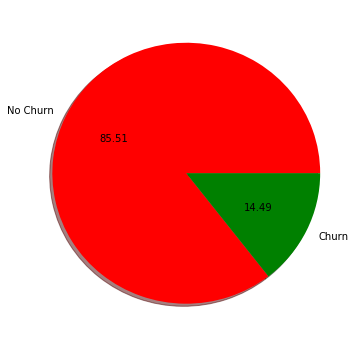

In [56]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.pie(np.c_[len(y)-np.sum(y),np.sum(y)][0],labels=['No Churn','Churn'],colors=['r','g'],shadow=True,autopct ='%.2f' )
fig = plt.gcf()
fig.set_size_inches(6,6)

## Data

Observe data

In [57]:
import numpy as np

np.mean(X,axis=0)
np.var(X,axis=0)

array([  1.58532433e+03,   1.79478761e+03,   8.75182028e-02,
         2.00104799e-01,   1.87315130e+02,   2.96580639e+03,
         4.02647298e+02,   8.57114045e+01,   2.57112237e+03,
         3.96791913e+02,   1.85762804e+01,   2.55694661e+03,
         3.82815581e+02,   5.17804314e+00,   7.79202952e+00,
         6.05575823e+00,   5.68002683e-01,   1.72999748e+00])

A problem in Scikit-Learn is modeled as follows:

+ Input data is structured in Numpy arrays. The size of the array is expected to be [n_samples, n_features]:

    + *n_samples*: The number of samples ($N$): each sample is an item to process (e.g. classify). A sample can be a document, a picture, a sound, a video, an astronomical object, a row in database or CSV file, or whatever you can describe with a fixed set of quantitative traits.
  
    + *n_features*: The number of features ($d$) or distinct traits that can be used to describe each item in a quantitative manner. Features are generally real-valued, but may be boolean, discrete-valued or even cathegorical.

$${\rm feature~matrix:} {\bf X}~=~\left[
\begin{matrix}
x_{11} & x_{12} & \cdots & x_{1d}\\
x_{21} & x_{22} & \cdots & x_{2d}\\
x_{31} & x_{32} & \cdots & x_{3d}\\
\vdots & \vdots & \ddots & \vdots\\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{Nd}\\
\end{matrix}
\right]$$

$${\rm label~vector:} {\bf y}~=~ [y_1, y_2, y_3, \cdots y_N]$$
    

The number of features must be fixed in advance. However it can be very high dimensional (e.g. millions of features) with most of them being zeros for a given sample. 

Create and fit a decision tree (you can find it in the module sklearn.tree and the name is DecisionTreeClassifier)

In [58]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Predict the data you used for training/fiting the classifer

In [60]:
yhat = clf.predict(X)
print(yhat)

[ 0.  0.  0. ...,  0.  0.  0.]


<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We need a measure of how well the classifier is performing. `yhat` is a list and our target outcome `y`is also a list. Create a measure of accuracy. </div>

In [63]:
def err_rate(y, yhat):
    numerator = 0
    for i in range(len(y)):
        numerator = numerator + 1 if y[i]!=yhat[i] else numerator
    return numerator/len(y)

def accuracy(y, yhat):
    return 1 - err_rate(y, yhat)

0.0

One sensible way of measuring the goodness of a classifier is measuring the error rate, i.e. the number of times the classifier fails divided by the total number of elements.

$$err = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}!=y}$$

where $\mathbb{1}_{\text{cond}}$ is the indicator function given a condition, $\text{cond}$, defined as 

$$\mathbb{1}_{\text{cond}}=\left \{\begin{align} 1 & \quad\text{if cond = True}\\ 0 & \quad\text{otherwise} \end{align}\right.$$
Alternatively, we can report the accuracy, defined as the rate of success

$$acc = \frac{1}{N}\sum \mathbb{1}_{\tilde{y}==y}.$$

Observe that $acc = 1-err$.

`sklearn` reports this result using the method from module `metrics`, `.accuracy_score`.

In [75]:
from sklearn import metrics

metrics.accuracy_score(y,yhat)

1.0

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this the value we expect to have when we apply this method in production?</div>

In real applications we will train a classifier on a given data set but then apply the classifier to unseen data. Let us simulate this process by spliting the data set in two sets. We will call data we use for fiting the classifier training and data used for assessing the performance, test data.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> Split the data set 70% for training purposes and the rest for test purposes. You should end up with four variables `X_train`, `y_train`, `X_test`, `y_test`. <p>
<b>OTHER REQUIREMENTS:</b> Reshuffle data using a permutation of the indexes (`np.random.permutation(...)`) and set the seed of the random number generator using `np.random.seed(42)`
</div>

In [70]:
np.random.seed(42)
permuted_data = np.random.permutation(data)
split_value = int(np.floor(len(permuted_data) * 0.7))
X_train, y_train = permuted_data[:split_value,:-1], permuted_data[:split_value, -1]
X_test, y_test = permuted_data[split_value:,:-1], permuted_data[split_value:, -1]

Split data in training and set, use the module cross_validation, train_test_split , use random_state=42 as an argument for reproductibility.

In [71]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)

Let us try a new algorithm, nearest neighbor, with parameter n_neighbors = 1

In [72]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
yhat = clf.predict(X_train)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


1.0

In [73]:
yhat = clf.predict(X_test)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.81100000000000005

<div class = "alert alert-info" style="border-radius:10px"> <b>QUESTION:</b> Is this a good result?</div>

In [74]:
#INSERT SNOOPING CODE

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=42)

X_train_scaled = scaler.fit_transform(X_train)


clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_train_scaled)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


X_test_scaled = scaler.transform(X_test)

yhat = clf.predict(X_test_scaled)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.86599999999999999

In [75]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

clf = neighbors.KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train_scaled,y_train)
yhat = clf.predict(X_train_scaled)
from sklearn import metrics

metrics.accuracy_score(y_train,yhat)


1.0

In [76]:
from sklearn.preprocessing import StandardScaler

X_test_scaled = scaler.transform(X_test)

yhat = clf.predict(X_test_scaled)
from sklearn import metrics

metrics.accuracy_score(y_test,yhat)

0.86599999999999999

This result is ok, but how consistent is it? Maybe we have been lucky with the train-test partion. We can repeat this process for different values of the random_state (or just use random permutations) and report the average result.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a vector of accuracies, `acc`, of shape (10,1) with the values of testing a 1-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. Use `sklearn.cross_validation.train_test_split` function.
</div>

In [17]:
r_state = [0,1,2,3,4,5,42,43,44,45]

In [23]:
from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn import metrics
import numpy as np

def test_model(random_seeds, data):
    acc = []
    for seed in random_seeds:
        
        scaler = StandardScaler()
        
        #splitting
        X_train, X_test, y_train, y_test = model_selection.train_test_split(data[:,:-1], data[:,-1], train_size=0.7, random_state=seed)
        
        #Scaling train set
        X_train_scaled = scaler.fit_transform(X_train)
        
        #Model training
        clf = neighbors.KNeighborsClassifier(n_neighbors=1)
        clf.fit(X_train_scaled,y_train)
        
        #Scaling test set
        X_test_scaled = scaler.fit_transform(X_test)
        yhat = clf.predict(X_test_scaled)
        
        acc.append(metrics.accuracy_score(y_test,yhat))
    return acc

accuracies = test_model(r_state, data)
acc = np.array(arr = accuracies, )
        

Check your code with the following visualization code:

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
plt.scatter(np.ones(acc.shape)+0.01*np.random.normal(size=(10,1)),acc,alpha = 0.5,color='r')

AttributeError: 'list' object has no attribute 'shape'

<div class = "alert alert-info" style = "border-radius:10px"> <b>QUIZ:</b> Report the average accuracy.</div>

In [96]:
#Your code

In [98]:
assert np.abs(value-0.8691)<0.0001

# Model selection (I)

We have tried a 1-Nearest Neighbors classifiers but we could try also different values for the Nearest Neighbors. The selection of a model between different alternatives is called model selection. We can use the same strategy as before and report accuracies for the three models. Let us do it comparintg 1-NN, 3-NN and a DecisionTree.

<div class="alert alert-success" style = "border-radius:10px"><b>EXERCISE:</b> We want a matrix of accuracies, `acc`, of shape (10,3) with the values of testing a decision tree, a 1-NN, and a 3-NN classifier on a `train_size=0.7` for the different random_states stored in the array `r_state`. 
</div>

In [25]:
#Your code

from sklearn import metrics
from sklearn import tree
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler

r_state = [0,1,2,3,4,5,42,43,44,45]

acc = np.zeros((len(r_state),3))

for i in range(len(r_state)):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, random_state=r_state[i])
    
    #Your code here
    
    acc[i,0] = metrics.accuracy_score(y_test,yhat_tr)
    acc[i,1] = metrics.accuracy_score(y_test,yhat_nn1)
    acc[i,2] = metrics.accuracy_score(y_test,yhat_nn3)

NameError: name 'X' is not defined

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
plt.boxplot(acc)
plt.scatter(np.tile(np.array([1,2,3]),(10,1))+0.01*np.random.normal(size=(10,3)),acc,alpha = 0.5,color='r')

<div class = "alert alert-info" style = "border-radius:10px" ><b>QUIZ:</b > What is the best of the three methods?</div>

<div class = "alert alert-info" style = "border-radius:10px"><b>QUIZ:</b> What is the expected accuracy of the selected method in exploitation over unseen data? </div>

<div class="alert alert-danger" style = "border-radius:10px"><b>MAIN QUEST EXERCISE:</b> The  `breast_cancer` dataset from `datasets` (check `load_breast_cancer`) reports a set of clinical trials with the outcome of breast cancer detection. We want to build a method to predict whether a patient has a potential cancer or not according to her clinical trials.

<p>

For that purpose we will use two different models, a support vector machine and a gradient boosting machine. We will train different settings of a support vector machine (`svm.SVC`) and a single gradient boosting machine (`ensemble.GradientBoostingMachine`) with the following parameters:

<ul>
<li>
`svm.SVC(C=10.0,gamma = 1e-5,random_state=42)`
</li>
<li>
`svm.SVC(C=100.0,gamma = 1e-5,random_state=42)`
</li>
<li>
`svm.SVC(C=1000.0,gamma = 1e-6,random_state=42)`
</li>
<li>
`ensemble.GradientBoostingClassifier(random_state=42)`
</li>
</ul>
<p>
For selection purposes and accuracy evaluation we will use `model_selection.train_test_split`.
The data set will be divided using parameters `test_size = 100` and `random_state=42`. As a result of this first division we will have a big training set and a 100 samples test set. Following that and using the same settings we will divide the remaining training set into the final training set and the validation set with 100 samples again.

<p>

Prepare the following answers:

<ol>
<li>
Check the sizes of the training, validation and test sets.
</li>
<li>
Report the training accuracy of all four methods.
</li>
<li>
Report the validation accuracy for all methods.
</li>
<li>
Report the performance of all methods using the test set.
</li>
</ol>

<p>
In the light of the answers obtained from the exercise:
<ul>
<li>
Question 1: What is the size of the training set? 
</li>
<li>
Question 2: What method do you select?
</li>
<li>
Question 3: What is the expected performance of the method selected?
</li>
</ul>

</div>

In [33]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

data = load_breast_cancer()
X = data.data
y = data.target

X.shape

(569, 30)

In [32]:
#Your code

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train, X_test, y_train, y_test  = model_selection.train_test_split(X,y, test_size=100, random_state=42)
X_train, X_validation, y_train, y_validation  = model_selection.train_test_split(X_train,y_train, test_size=100, random_state=42)


X_train_scaled = scaler.fit_transform(X_train)

from sklearn import svm, ensemble

def svc(c, X_train_scaled, y_train, X_test, y_test):
    clf = svm.SVC(C=c, gamma = 1e-5, random_state=42)
    clf.fit(X_train_scaled, y_train)
    yhat = clf.predict(X_train_scaled)
    from sklearn import metrics
    train_accuracy = metrics.accuracy_score(y_train, yhat)
    X_test_scaled = scaler.transform(X_test)
    
    
